In [25]:
import cv2
import math
import requests # For reading image from URL
import numpy as np
import matplotlib.pylab as plt
from cv2.gapi import BGR2Gray
from google.colab.patches import cv2_imshow # For displaying image in Google Colab

def read_image_from_url(url):
    # Fetch the content from the url
    response = requests.get(url)
    # Check if the request was successful
    response.raise_for_status()
    # Convert the response content to a numpy array and then to a OpenCV BGR image
    image = cv2.imdecode(np.asarray(bytearray(response.content), dtype="uint8"), cv2.IMREAD_COLOR)
    return image

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>سوالات تئوری</b>
</font>

<p>در این بخش تئوری درس را مرور می‌کنیم. جواب سوالات مشخص شده را می‌توانید در یک سلول جدا بنویسید</p>

<p>
<b>سوال ۱.</b>
فرض کنید در حال تهیه گزارشی هستید که باید در تصویری به سایز ۲۰۴۸ در ۲۰۴۸ پیکسل قرار بگیرد.
<ul>
الف) با فرض عدم محدودیت در پرینتر، وضوح تصویر (بر حسب خط در هر میلی‌متر) چقدر باید باشد تا تصویر در فضایی به اندازه ۵ در ۵ سانتی‌متر قرار بگیرد؟
</ul>
<ul>
ب) وضوح تصویر بر حسب dpi باید چقدر باشد تا تصویر در ۲ در ۲ اینچ قرار بگیرد؟
</ul>

</p>

<p>
</p>




</div>
</font>

A)
2048 pixel / 50 mm = 40.96 pixel/mm ===> 40.96/2 = 20.48 lp/mm (line pairs per mm)


B)
(DPI : Dots per Inch)

Horizontal DPI = Vertical DPI = 2048/2 = 1024

DPI = (Horizontal DPI + Vertical DPI)/2 = 1024



<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>تمرین ۱:</b>
</font>


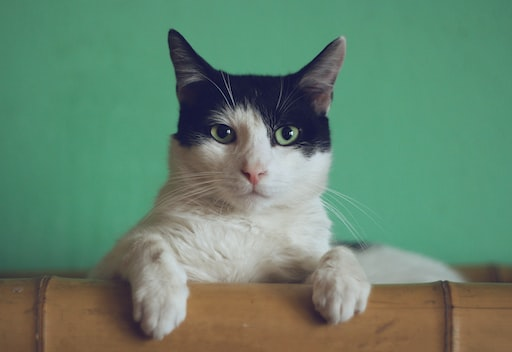

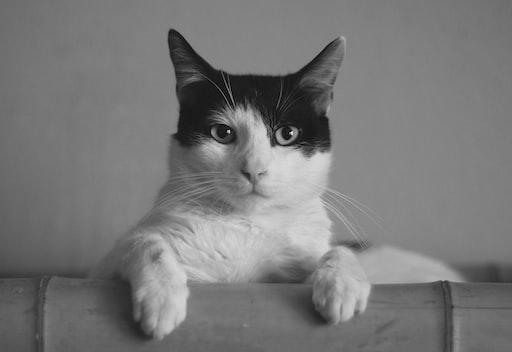

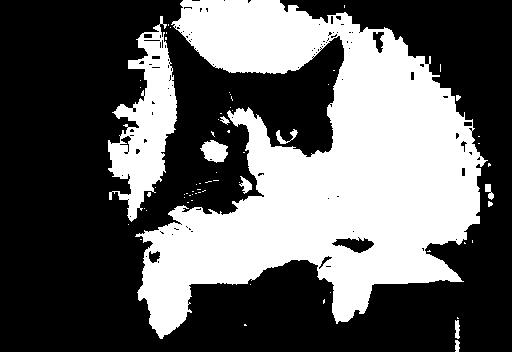

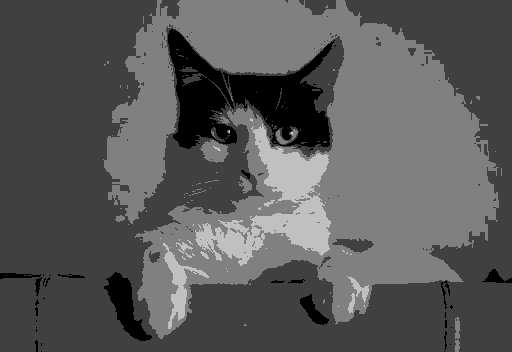

In [26]:
URL = 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?auto=format&fit=crop&q=80&w=512&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
colored_image = read_image_from_url(URL)
cv2_imshow(colored_image)

# TODO: Convert the image to grayscale
grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)

# TODO: Convert the grayscale image to binary
threshold_value = 128
max_value = 255
ret, binary_image = cv2.threshold(grayscale_image, threshold_value, max_value, cv2.THRESH_BINARY)

cv2_imshow(binary_image)

# TODO:
k = 4
np_img = np.array(grayscale_image)
interval = int(np.floor(256/k))
tresholds = [i*interval for i in range(k+1)]

for i in range(np_img.shape[0]):
    for j in range(np_img.shape[1]):
        for k in range(len(tresholds)-1):
            if np_img[i,j]>tresholds[k] and np_img[i,j]<tresholds[k+1]:
                np_img[i,j] = tresholds[k]

cv2_imshow(np_img)




<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>تمرین ۲:</b>
</font>

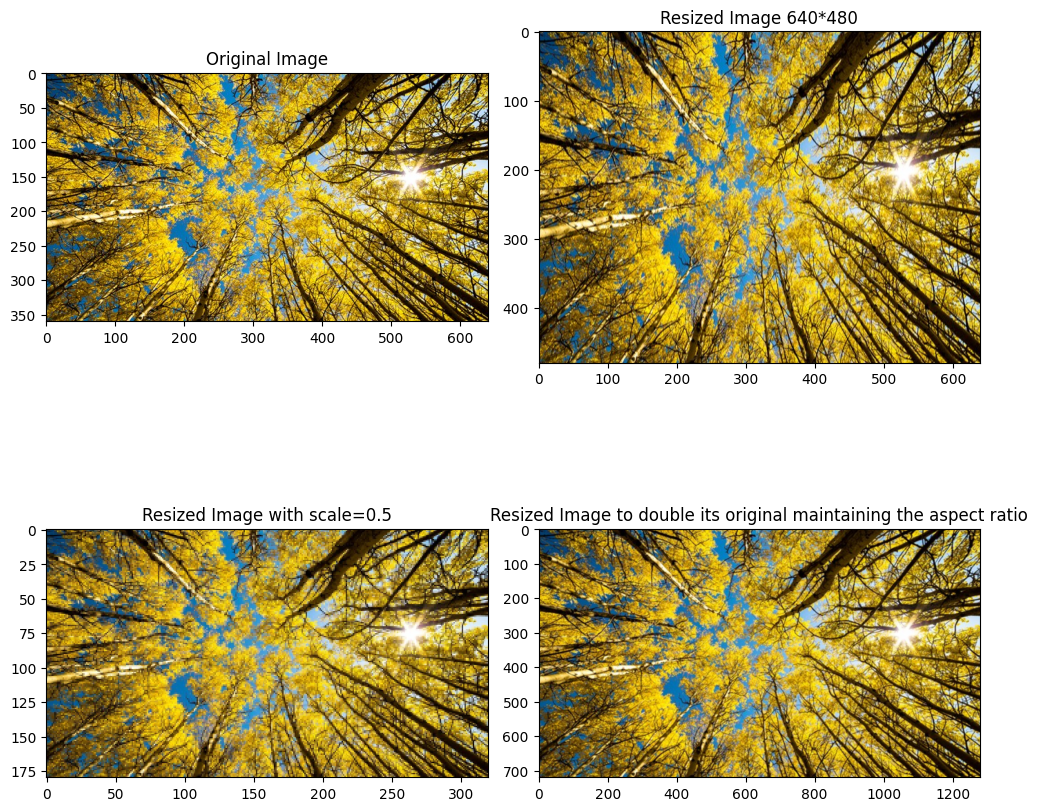

In [27]:
img = read_image_from_url("https://www.nps.gov/common/uploads/grid_builder/nature/crop16_9/8697FC59-BB6B-D535-D059DB406DE0A4D3.jpg?width=640&quality=90&mode=crop")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# TODO: Resize the image to have dimensions 640x480
resized_img=cv2.resize(img,(640,480))

# Display the original and resized images
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')

# Resized Image
plt.subplot(2, 2, 2)
plt.imshow(resized_img)
plt.title('Resized Image 640*480')

# TODO: Resize the image to be 50% of its original size
scale=0.5
width=img.shape[0]
height=img.shape[1]
new_width =int(width*scale)
new_height =int(height*scale)
new_dimensions = (new_height, new_width)
resized2_img = cv2.resize(img, new_dimensions)
plt.subplot(2, 2, 3)
plt.imshow(resized2_img)
plt.title('Resized Image with scale=0.5')

# TODO: Resize the image to double its original width while maintaining the aspect ratio
new_width = width * 2
new_height = int((height* new_width) / width)
new_dimensions = (new_height, new_width)
resized2_img = cv2.resize(img, new_dimensions)
plt.subplot(2, 2, 4)
plt.imshow(resized2_img)
plt.title('Resized Image to double its original maintaining the aspect ratio')


plt.tight_layout()
plt.show()

<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>تمرین ۳:</b>
</font>

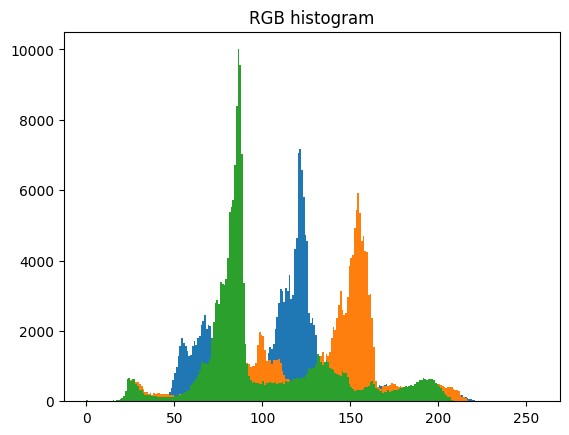

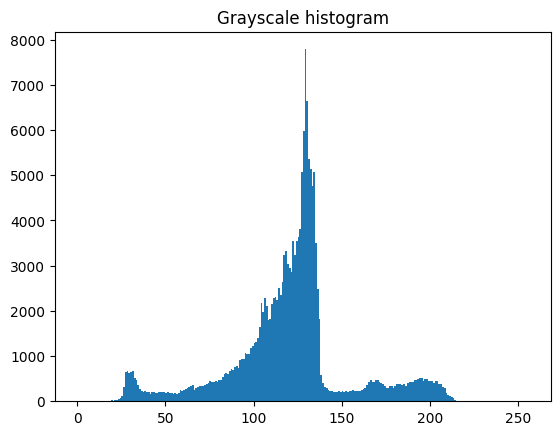

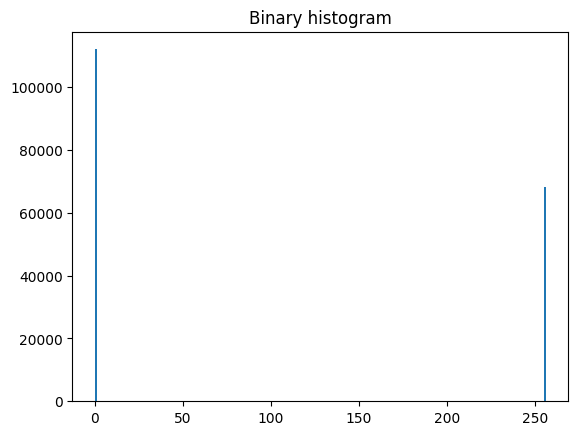

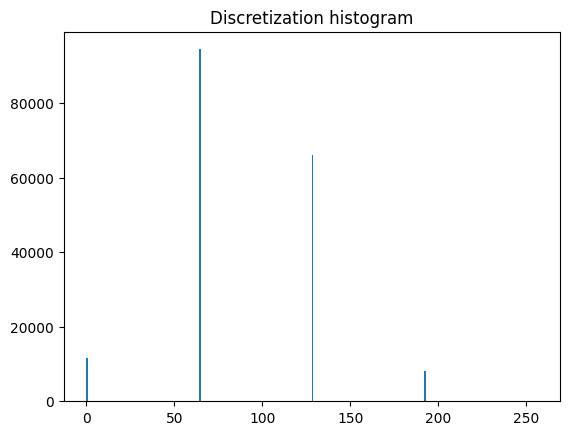

In [28]:
# Your desired image
URL = 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?auto=format&fit=crop&q=80&w=512&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
colored_image = read_image_from_url(URL)
grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)

# TODO: Calculate and plot the histograms
b ,g ,r=cv2.split(colored_image)

plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])
plt.title('RGB histogram')
plt.show()


plt.hist(grayscale_image.ravel(),256,[0,256])
plt.title('Grayscale histogram')
plt.show()


plt.hist(binary_image.ravel(),256,[0,256])
plt.title('Binary histogram')
plt.show()


plt.hist(np_img.ravel(),256,[0,256])
plt.title('Discretization histogram')
plt.show()

<br>
<p align="justify">
<font size=4>
# TODO: Compare the histograms and provide observations

تصویر رنگی از سه کانال تشکیل شده که هر کدام از این کانال ها شدت های متغییری بین 0 تا 255 دارند و در نمودار آن مشهود است.

در نمودار هیستوگرام برای تصویر گری اسکیل با توجه به این که یک کانال داریم که رنگ خاکستری را نشان میدهد و شدت های نتفاوتی بین 0 تا 255 را داریم نمودار به شکل یک توزیع گسسته روی 0 تا 255 بدست آمده است.

در نمودار سوم که مربوط به تصویر باینری است تنها دو شدت 0 و 255 را داریم که به طور مشخص در این هیستوگرام تنهاشدت هایی با 0 و 255 موجود هستند و اثری از بقیه شدت ها نیست.

در نمودار چهارم که گسسته سازی انجام دادیم نیز تنها 4 شدت متفاوت در نظر گرفتیم و در هیستوگرام نیز تنها 4 نقطه وجود دارد که شدتی برای آن تعریف شده است و اثری از بقیه شدت ها در این نمودار نمیبینیم.

</font>
</p>

</div>
</font>